In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [18]:
DT = 0.1
T = 100.
NT = int(T/DT)
T = NT * DT

THETA = 0.7
TAU = 1.0

r0 = 1.0

In [27]:
t_pr = 0.0

r_th = np.zeros((NT))
r_tau = np.zeros((NT))

for t in range(1, NT):
    r_th[t] = r_th[t-1] - DT * r_th[t-1] / TAU
    r_tau[t] = r_tau[t-1] - DT * r_tau[t-1] / TAU
    
    if (t - t_pr) * DT >= 1./r0:
        r_tau[t] += 1./TAU
        t_pr = t
        
    if np.abs(r_th[t] - r0) >= THETA:
        r_th[t] += 1.5*THETA

In [28]:
print((r_tau-r0).std(), (r_th-r0).std())

0.3150301901537804 0.31192698461740315


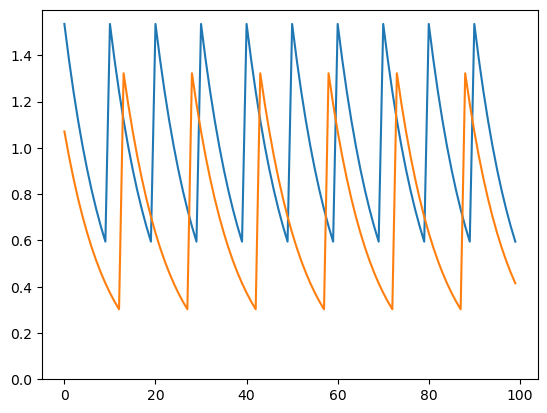

In [29]:
plt.plot(r_tau[-100:])
plt.plot(r_th[-100:])

plt.ylim(bottom=0.)
plt.show()